# **Exploring average gene expression**

Investigating cell atlases often involves exploring gene expression patterns across different cell types and organs. This tutorial guides you through using the [*atlasapprox* API](https://atlasapprox.readthedocs.io/en/latest/python/index.html) to explore gene expression data effectively. You will gain a general idea of how to query average expression, discover patterns of similar genes, identify marker genes, and visualize the data.

## **Contents**
- Querying average expression data for a single organ
- Querying expression data for multiple organs
- Identifying expression patterns of similar genes
- Querying expression data for marker genes

### **Installation**

Before we begin, let’s install the atlasapprox package and the required visualization libraries. Run the following commands to ensure everything is set up.

In [20]:
# Install atlasapprox
! pip install atlasapprox

# Install visualisation libraries
! pip install matplotlib seaborn

zsh:1: /Users/xuxinyi/Desktop/AtlasApproxTut /cjenv/bin/pip: bad interpreter: /Users/xuxinyi/Desktop/cjenv/bin/python3.10: no such file or directory
zsh:1: /Users/xuxinyi/Desktop/AtlasApproxTut /cjenv/bin/pip: bad interpreter: /Users/xuxinyi/Desktop/cjenv/bin/python3.10: no such file or directory


**Note:** If you encounter installation issues, refer to the [Quick Start Tutorial](https://github.com/Amber-Xu914/atlasapprox_api_tutorials/blob/main/python/quick_start.ipynb) for detailed instructions. Make sure you're using a Python environment with `pip` properly configured

### **Import libraries**

To follow along with the data visualization in this tutorial, first install the following packages using `pip`, and then import them by running this command in your terminal or Jupyter notebook:

In [ ]:
# Import the atlasapprox API
import atlasapprox

# Import data analysis and visualization libraties
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the API
api = atlasapprox.API()

## **Querying average gene expression data**

The `average` method allows you to retrieve average gene expression of selected genes across cell types within a specific organ of a species. 

Use the following code to get the average gene expression data for four exmaple genes (*PRDM1*, *PTPRC*, *ACTB*, *GAPDH*) in the human lung across cell types:

In [4]:
avg_gene_expr_lung = api.average(
    organism='h_sapiens', 
    organ='lung', 
    features=['PRDM1', 'PTPRC', 'ACTB', 'GAPDH'],
    measurement_type='gene_expression'
)

# display the result
avg_gene_expr_lung

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
PRDM1,0.176963,0.023585,0.513526,0.096009,0.537103,0.271958,1.854829,4.183407,4.089833,0.000000,...,0.673243,0.642761,0.062911,0.010669,0.089538,0.256048,0.000000,0.622059,0.012507,0.000000
PTPRC,22.312710,2.443684,7.794549,2.801027,4.313318,3.000779,0.420067,10.513119,11.431522,2.168309,...,0.150060,0.176818,0.000295,0.053329,0.193483,0.599914,0.412100,0.638058,0.586943,0.541398
ACTB,118.968338,28.412338,73.133392,36.433022,83.107658,34.711636,7.987900,41.437916,50.840790,31.894224,...,39.336956,43.228111,41.284988,76.240593,64.459953,110.258560,88.963966,56.245354,23.728510,25.516708
GAPDH,5.091514,8.243008,15.813489,6.639565,14.888375,7.871206,3.131831,9.229094,7.430374,4.452652,...,11.298073,15.292169,10.623665,12.352937,5.550277,13.013269,7.603179,7.462914,9.748388,19.264896


#### Understand the Output
This `average` method returns a *Pandas DataFrame* where:

* Each row represents a gene.
* Each column corresponds to a cell type.
* The values indicate the average gene expression, measured in counts per ten thousand (cptt).

A glance at the DataFrame reveals that *ACTB* consistently exhibits higher gene expression across all cell types compared to other genes. In contrast, *PRDM1* shows very low expression overall.

However, analysing large sets of numerical data can be challenging. Visualizing the data in a graph format makes the differences more apparent.

### **Visualizing the data**

To visualize the average expression data of the queried genes, a heatmap is an effective starting point. The Python visualization libraries [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/) offer powerful tools for creating such heatmaps. 

Here is a way to create one using Seaborn's `heatmap` method with custom colours and labels:

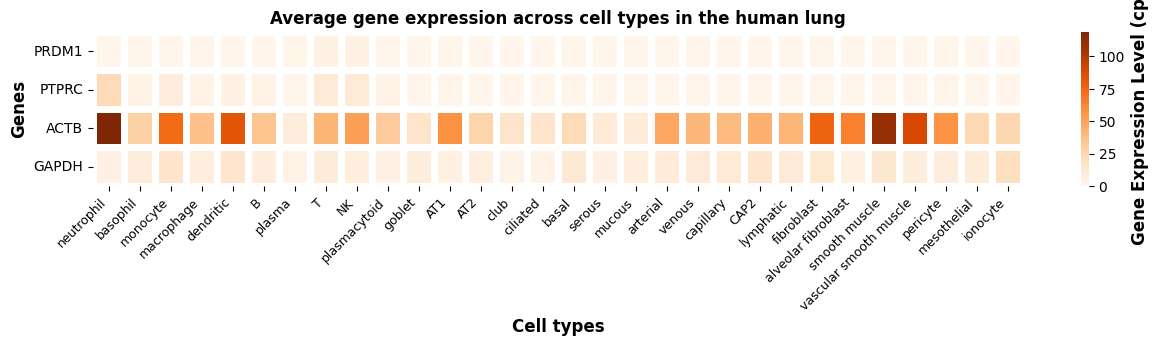

In [10]:
# Create the heatmap
plt.figure(figsize=(15, 2))

heatmap = sns.heatmap(
        avg_gene_expr_lung, 
        cmap="Oranges", 
        linewidths=5,
        cbar_kws={'label': 'Gene Expression Level'}
)

# Customize labels
plt.title('Average gene expression across cell types in the human lung', fontweight='bold')
plt.xlabel("Cell types", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.ylabel("Genes", fontsize=12, fontweight='bold')
cbar = heatmap.collections[0].colorbar
cbar.set_label("Gene Expression Level (cptt)", fontweight="bold", fontsize=12)

# Show the plot
plt.show()

From the color gradient, it is easier to compare the expression levels across different cell types. By looking at the heatmap, it is clear that *ACTB* exhibits consistently high gene expression across all cell types compared to the other genes. In contrast, *PRDM1* shows very low expression overall.

## **Querying average gene expression for multiple organs**

The following example demonstrates the average gene expression of four genes (same as above) across three human organs (*bladder*, *blood*, and *colon*).

*Atlasapprox* API doesn't have any method to explore multiple organs at the same time, you can use the following code to make a for loop. At the same time, a plotted data always better then numbers, try to call sns `heatmap` to display the data:

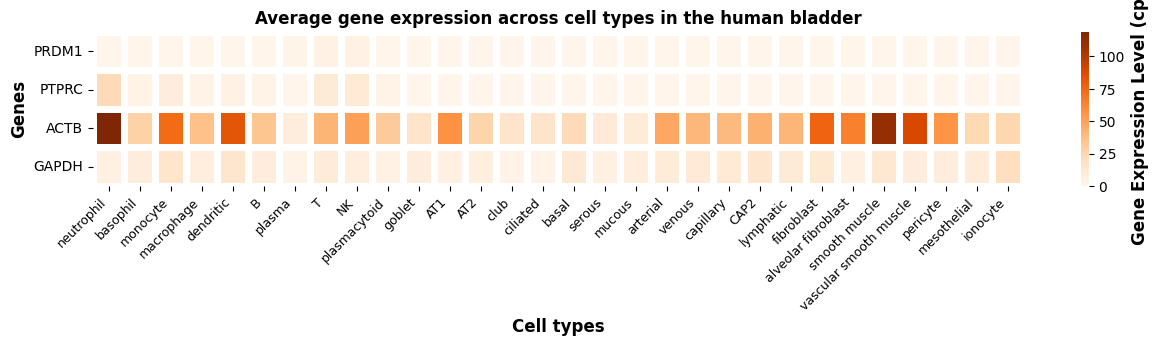

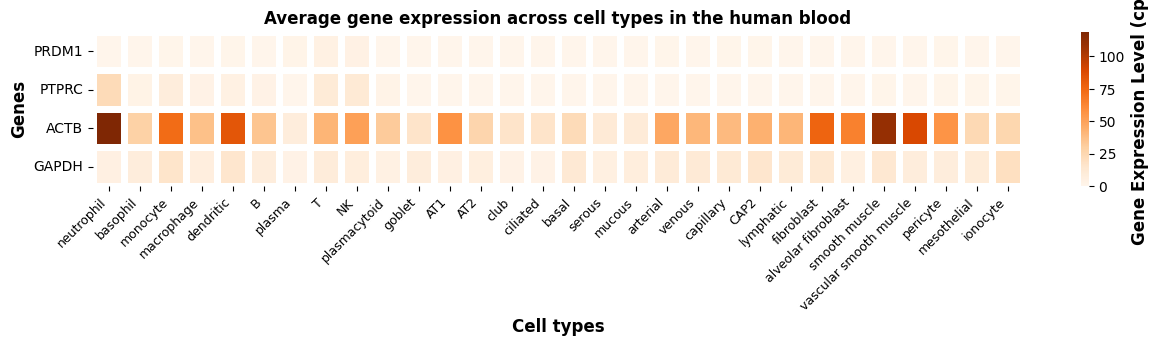

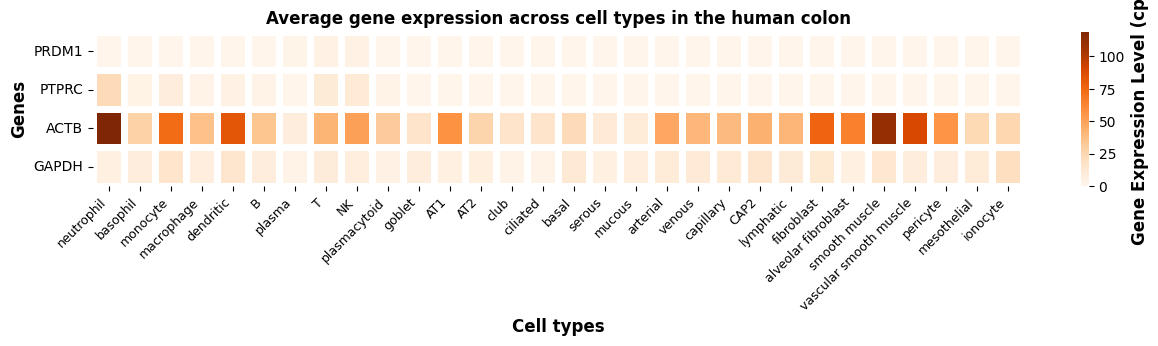

In [9]:
# Define the target organs.
organ_list = ['bladder','blood','colon']

# create a dictionary to store each avg_gene_expr
avg_gene_expr_dic = {}

# Loop through organ_list and display the results
for organ in organ_list: 
    avg_gene_expr = api.average(
        organism='h_sapiens', 
        organ=organ, 
        features=['PRDM1', 'PTPRC', 'ACTB', 'GAPDH'],
    )

    # Store results into dictionary
    avg_gene_expr_dic[organ] = avg_gene_expr

    plt.figure(figsize=(15, 2))
    heatmap = sns.heatmap(
        avg_gene_expr_lung, 
        cmap="Oranges", 
        linewidths=5,
        cbar_kws={'label': 'Gene Expression Level'}
    )

    # Customize labels
    plt.title(f'Average gene expression across cell types in the human {organ}', fontweight='bold')
    plt.xlabel("Cell types", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha="right", fontsize=9)
    plt.ylabel("Genes", fontsize=12, fontweight='bold')
    cbar = heatmap.collections[0].colorbar
    cbar.set_label("Gene Expression Level (cptt)", fontweight="bold", fontsize=12)

    # Show the plot
    plt.show()

By comparing these three heatmaps, *ACTB* exhibits consistently high expression across all the selected organs, indicating a similar expression pattern among them.

## **Exploring genes with similar expression patterns**

When you have a gene of interest, you might want to find genes with similar expression patterns. This example shows you how to use the `similar_features` method to retrieve the top 10 genes with expression patterns similar to *TP53* in the human lung:

In [12]:
similar_features = api.similar_features(
    organism='h_sapiens', 
    organ='lung', 
    feature='TP53',
    method='correlation',
    number=10
)

similar_features

METTL14     0.134515
HDAC8       0.134577
MTOR        0.139444
HNRNPL      0.141596
LANCL2      0.142775
SEH1L       0.143445
MED4        0.145775
AHR         0.148074
HSPA14-1    0.149418
TRA2A       0.149765
dtype: float64

#### Understand the output

`similar_features` returns a *pandas.Series* where the **index** contains gene names, and the corresponding **data** represents their distance to *TP53*.

In this series, the **Pearson correlation** method is used to calculate the distance. This method produces a value between -1 and 1, where -1 signifies a perfect negative linear relationship, and 1 signifies a perfect positive linear relationship. From the resulting pandas.Series, the top 10 genes with the greatest similarity to *TP53* all exhibit positive linear relationships, with *TRA2A* showing the highest similarity. These genes may potentially be co-regulated with *TP53*.

Additionally, `similar_features` supports the following methods for distance calculation:
- **cosine**: Computes cosine similarity/distance based on the fraction detected.
- **euclidean**: Measures Euclidean distance based on average measurements (e.g., expression levels).
- **manhattan**: Calculates the taxicab/Manhattan/L1 distance of average measurements.
- **log-euclidean**: Applies a logarithmic transformation to the average measurement (with a pseudocount of 0.001) before calculating the Euclidean distance, which highlights sparsely measured features.

## **Get average gene expression for similar features**

You can then use the `average` method to retrieve the average gene expression of these similar genes. Use **similar_features.index** to extract the gene names returned by `similar_features`, and pass them as the parameter (features) to the `average` method. 

You can either use `print` method to directly display the resulting *pandas.DataFrame*, or, as shown in the example below, use Seaborn’s `heatmap` method to present a more intuitive graphical representation:

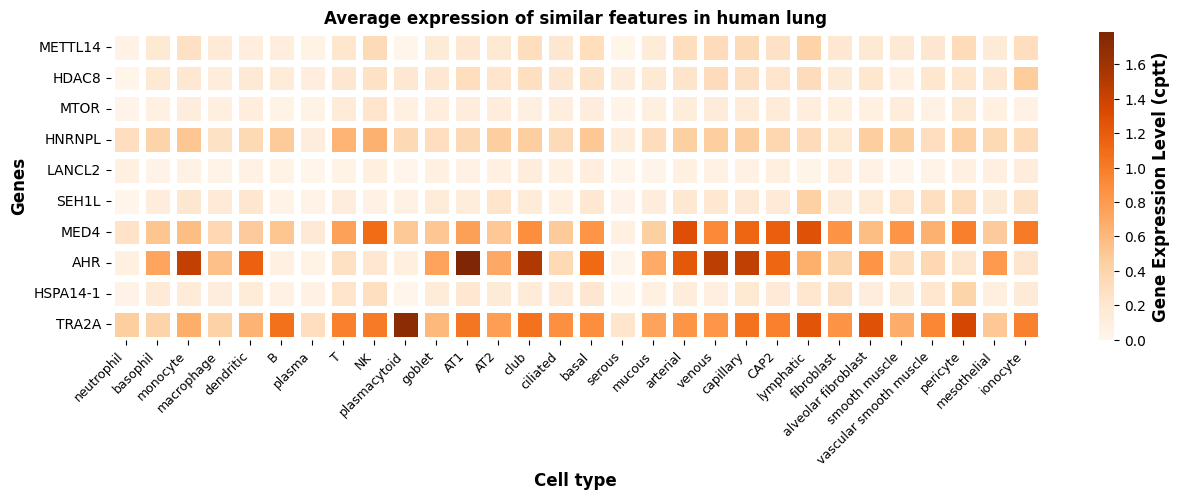

In [14]:
# Get average gene expression 
avg_similar_features = api.average(
    organism='h_sapiens',
    organ='lung',
    features=similar_features.index
)

plt.figure(figsize=(15, 4))
heatmap = sns.heatmap(
        avg_similar_features,
        cmap="Oranges",
        linewidths=5,
        cbar_kws={"label": "Gene Expression Level"} 
        )

# Set labels
plt.title(f"Average expression of similar features in human lung", fontweight='bold')
plt.xlabel("Cell type", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.ylabel("Genes", fontsize=12, fontweight='bold')
cbar = heatmap.collections[0].colorbar
cbar.set_label("Gene Expression Level (cptt)", fontweight="bold", fontsize=12)

# Show the plot
plt.show()

## **Finding marker genes for specific cell type in organ**

If you're unsure which genes to explore, marker genes can be a helpful starting point. The following example demonstrates how to retrieve marker genes for your organ and cell type of interest, followed by querying the average expression of these genes.

First, use the `markers` method to obtain the top 5 marker genes for neutrophils in the human lung:

In [15]:
markers_in_human_lung_neu = api.markers(
    organism='h_sapiens', 
    organ='lung', 
    cell_type='neutrophil', 
    number=5
)

markers_in_human_lung_neu

['CXCR2', 'FCGR3B', 'IL1R2', 'G0S2', 'MTND5P32']

### Retrieve and plot

Next, use the `average` method to retrieve the average gene expression of these genes, then, use Seaborn’s `heatmap` to visualize your data:

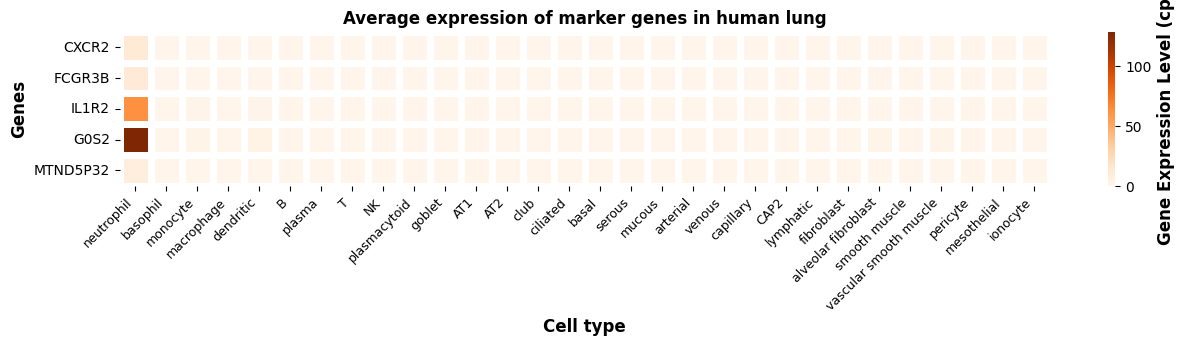

In [18]:
# Getting average gene expression for marker genes
avg_gene_expr_markers = api.average(
    organism='h_sapiens',
    organ='lung',
    features=markers_in_human_lung_neu
)

plt.figure(figsize=(15, 2))
heatmap = sns.heatmap(
        avg_gene_expr_markers,
        cmap="Oranges",
        linewidths=5,
        cbar_kws={"label": "Gene Expression Level"} 
        )

# Set labels
plt.title(f"Average expression of marker genes in human lung", fontweight='bold')
plt.xlabel("Cell type", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.ylabel("Genes", fontsize=12, fontweight='bold')
cbar = heatmap.collections[0].colorbar
cbar.set_label("Gene Expression Level (cptt)", fontweight="bold", fontsize=12)

# Show the plot
plt.show()


### Understand the output
This heatmap displays the gene expression levels of five neutrophil marker genes across all cell types. 

A significant portion of the heatmap appears black, indicating that these genes have very low expression levels (between 0-20 cptt) in most cell types. Due to the wide range of gene expression values, the current scale is too broad to effectively show differences within the 0-20 range. In this case, applying a logarithmic transformation helps compress the range, making smaller expression differences more visible while minimizing the impact of extremely high values. You can use the following code:

<Figure size 800x200 with 0 Axes>

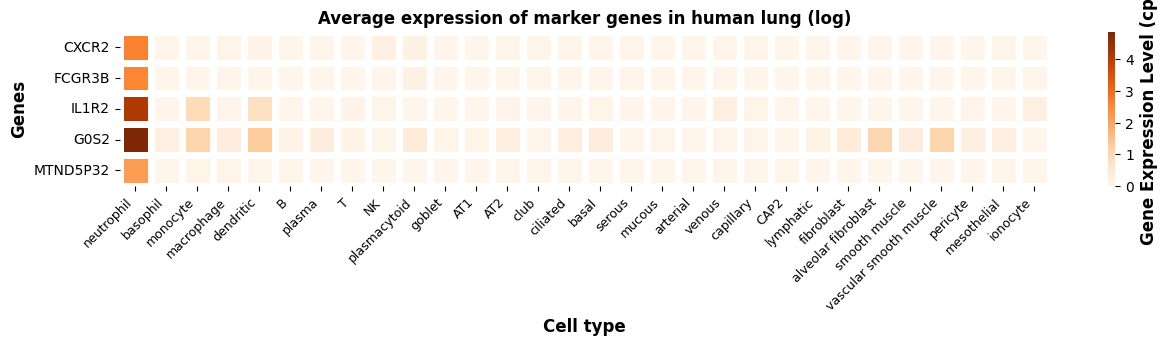

In [19]:
# Call log method in numpy to get all numbers logged
# add 1 to avoid "devide by 0"
avg_gene_expr_markers_log = np.log(avg_gene_expr_markers + 1)

# Display heatmap
plt.figure(figsize=(8,2))

plt.figure(figsize=(15, 2))
heatmap = sns.heatmap(
        avg_gene_expr_markers_log, 
        cmap="Oranges",
        linewidths=5,
        cbar_kws={"label": "Gene Expression Level"} 
        )

# Set labels
plt.title(f"Average expression of marker genes in human lung (log)", fontweight='bold')
plt.xlabel("Cell type", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.ylabel("Genes", fontsize=12, fontweight='bold')
cbar = heatmap.collections[0].colorbar
cbar.set_label("Gene Expression Level (cptt)", fontweight="bold", fontsize=12)

# Show the plot
plt.show()

To avoid division by zero, this example uses avg_gene_expr_markers + 1 instead of avg_gene_expr_markers. This addresses any potential blank cell issues while keeping the log scale consistent.

Comparing this heatmap with the original one, in this heatmap, all blank cells represent areas with no gene expression, while the other genes show low levels of expression across most cell types. It can be observed that *G0S2* is also expressed in *monocytes*, *dendritic cells*, *alveolar fibroblasts*, and *vascular smooth muscle*. Additionally, *IL1R2* shows expression in two other cell types as well. 

## **Conclusion** 

This tutorial introduces several methods for retrieving average gene expression using different API methods and how to use different packages for visualizing the data.

Thank you for using the *atlasapprox* API. For more detailed information, please refer to the [official documentation](https://atlasapprox.readthedocs.io/en/latest/python/index.html).

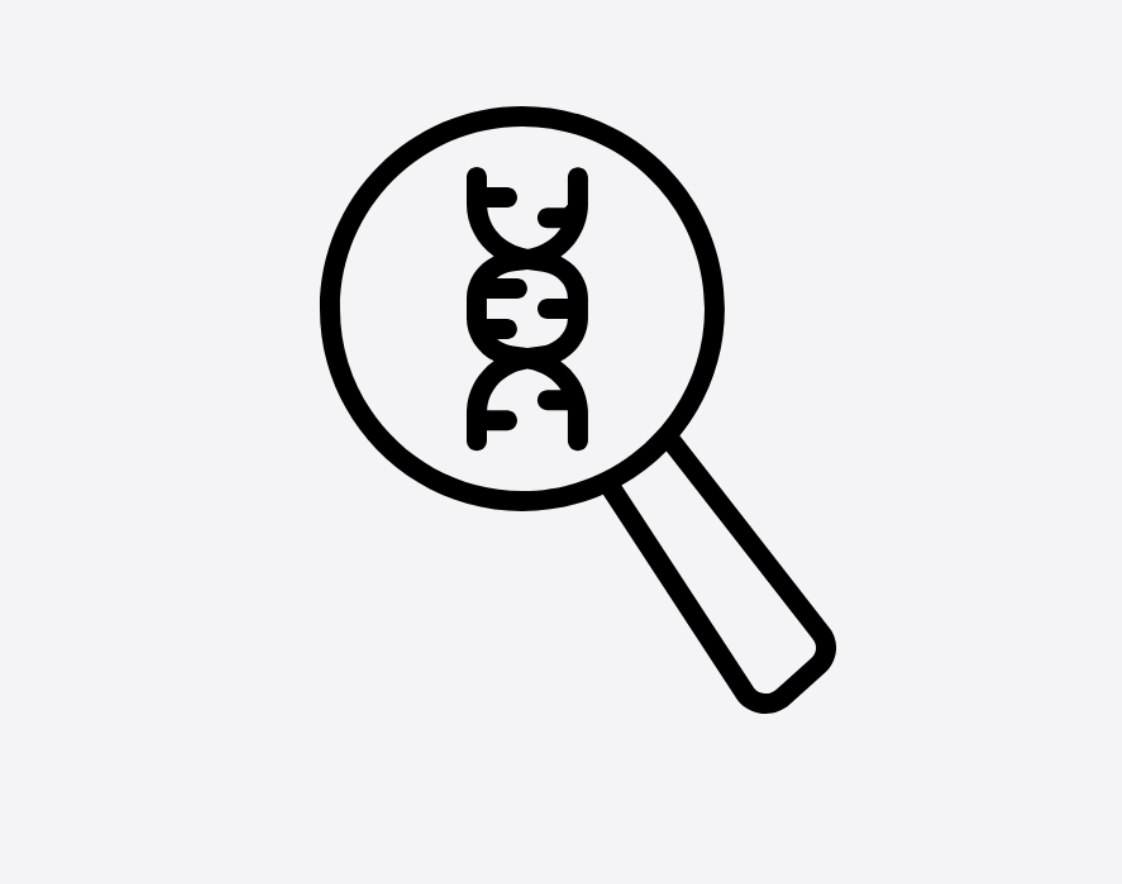

In [21]:
from IPython.display import display, Image

display(Image(filename="../_static/gene_expression.png"))
sphinx_gallery_thumbnail_number = -1